# Telecom Churn Prediction
**Author:** Prithviraj V (prithviraj.vetrivelu@outlook.com)

# 1. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 2. Data Preprocessing

## 2.1 Importing the libraries

In [329]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


## 2.2 Importing the dataset

In [330]:
main_dataset = pd.read_csv('train.csv')

In [331]:
main_dataset.shape

(69999, 172)

In [332]:
main_dataset.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.00,69999.0,69297.0,69297.0,69297.0,69999.00,69999.00,69999.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.0,67312.0,66296.0,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,69999.00,69999.00,69999.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.0,67312.0,66296.0,67231.00,67312.00,66296.00,69999.00,69999.00,69999.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,17568.00,17865.00,18417.00,69999.00,69999.00,69999.00,69999.00,69999.0
mean,34999.00,109.0,0.0,0.0,0.0,283.13,278.19,278.86,133.15,133.89,132.98,198.87,197.15,196.54,9.77,7.01,7.00,14.19,9.84,9.77,46.90,46.17,45.69,93.24,90.80,91.12,3.74,3.78,3.66,1.13,1

## 2.3 Describing the data.

In [333]:
print(main_dataset.info())
def metadata_matrix(data) :
    return pd.DataFrame({
                'Type' : data.dtypes.astype(str),
                'Non_Null_Count': data.count(axis = 0).astype(int),
                'NAN_Count': data.isnull().sum().astype(int),
                'Null_per': round(data.isnull().sum()/len(data) * 100 , 2),
                'Unique': data.nunique().astype(int)
                 }).sort_values(by='Null_per', ascending=False)

metadata_matrix(main_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


,Type,Non_Null_Count,NAN_Count,Null_per,Unique
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


## 2.4 Cleaning Data

In [334]:
main_dataset['id'].value_counts().sum()

69999

In [335]:
main_dataset = main_dataset.set_index('id')

In [336]:
# Renaming columns
main_dataset = main_dataset.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

## 2.5 Finding Catagorical Variables

In [337]:
columns=main_dataset.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=main_dataset[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and main_dataset[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( 'Categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

Categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_ic_t2o_mou_6
7   std_ic_t2o_mou_7
8   std_ic_t2o_mou_8
9    count_rech_3g_6
10   count_rech_3g_7
11   count_rech_3g_8
12  night_pck_user_6
13  night_pck_user_7
14  night_pck_user_8
15         fb_user_6
16         fb_user_7
17         fb_user_8 



Changing the above colums to catagory type

In [338]:
main_dataset[change_to_cat]=main_dataset[change_to_cat].astype('category')

By looking at the values of Sachet colums are considered as the catagorical variables.

In [339]:
sachet_columns = main_dataset.filter(regex='.*sachet.*', axis=1).columns.values
main_dataset[sachet_columns] = main_dataset[sachet_columns].astype('category')

Date time colums are string converting them to **datetime**

In [340]:
columns=main_dataset.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
main_dataset[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

In [341]:
for col in col_with_date:
    main_dataset[col]=pd.to_datetime(main_dataset[col], format="%m/%d/%Y")
main_dataset[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
id,,,,,,
0,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


## 2.6 Finding high value customer

In [342]:
main_dataset['Average_rech_amt_6n7']=(main_dataset['total_rech_amt_6']+main_dataset['total_rech_amt_7'])/2

main_dataset=main_dataset[(main_dataset['Average_rech_amt_6n7']>= main_dataset['Average_rech_amt_6n7'].quantile(0.7))]

In [343]:
#Checking for missing values.
missing_values = metadata_matrix(main_dataset)[['Type', 'Null_per']].sort_values(by='Null_per', ascending=False)
missing_values[missing_values['Null_per']>0]

,Type,Null_per
fb_user_6,category,62.43
arpu_3g_6,float64,62.43
arpu_2g_6,float64,62.43
night_pck_user_6,category,62.43
date_of_last_rech_data_6,datetime64[ns],62.43
av_rech_amt_data_6,float64,62.43
total_rech_data_6,float64,62.43
max_rech_data_6,float64,62.43
count_rech_2g_6,float64,62.43
count_rech_3g_6,category,62.43


Deleting the Colums with 50% empty value which is safe, imputing this colums will result in invalid predection.

In [344]:
metadata = metadata_matrix(main_dataset)
high_missing_values = metadata[metadata['Null_per'] > 50 ]
high_missing_value_columns = high_missing_values.index
main_dataset.drop(columns=high_missing_value_columns, inplace=True)

In [345]:
metadata_matrix(main_dataset)

,Type,Non_Null_Count,NAN_Count,Null_per,Unique
roam_og_mou_8,float64,20363,655,3.12,3324
loc_og_mou_8,float64,20363,655,3.12,14507
loc_og_t2c_mou_8,float64,20363,655,3.12,1472
std_og_mou_8,float64,20363,655,3.12,12663
loc_og_t2m_mou_8,float64,20363,655,3.12,12795
std_ic_t2o_mou_8,category,20363,655,3.12,1
loc_ic_t2m_mou_8,float64,20363,655,3.12,12491
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
std_ic_t2t_mou_8,float64,20363,655,3.12,3694
isd_og_mou_8,float64,20363,655,3.12,736


## 2.7 Imputing missing value

Missing data need to handeled on monthly basis each month are not dependent to each other.

**For Month 6**

In [346]:
month_columns = []
for column in main_dataset.columns:
    x = re.search("6$", column)
    if x:
        month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(main_dataset)
condition = metadata.index.isin(month_columns)
month_metadata = metadata[condition]
month_metadata[month_metadata['Null_per']>0]

,Type,Non_Null_Count,NAN_Count,Null_per,Unique
std_og_t2c_mou_6,category,20795,223,1.06,1
loc_og_mou_6,float64,20795,223,1.06,15156
std_og_mou_6,float64,20795,223,1.06,13776
std_ic_t2m_mou_6,float64,20795,223,1.06,5571
isd_og_mou_6,float64,20795,223,1.06,859
spl_og_mou_6,float64,20795,223,1.06,2643
og_others_6,float64,20795,223,1.06,773
std_ic_t2t_mou_6,float64,20795,223,1.06,3805
loc_ic_mou_6,float64,20795,223,1.06,14882
loc_ic_t2t_mou_6,float64,20795,223,1.06,8285


In [347]:
month_missing_condition = month_metadata['Null_per'] == 1.06
month_missing_cols = month_metadata[month_missing_condition].index.values
# Looking at all sixth month columns where rows of *_mou are null
condition = main_dataset[month_missing_cols].isnull()
# data.loc[condition, sixth_month_columns]


# Rows is null for all the above columns
missing_rows = pd.Series([True]*main_dataset.shape[0], index = main_dataset.index)
for column in month_missing_cols :
    missing_rows = missing_rows & main_dataset[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', main_dataset.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', main_dataset.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Filling missing mou with **0**

In [348]:
# Imputation
main_dataset[month_missing_cols] = main_dataset[month_missing_cols].fillna(0)

metadata = metadata_matrix(main_dataset)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(month_columns)].head()

,Type,Non_Null_Count,NAN_Count,Null_per,Unique
date_of_last_rech_6,datetime64[ns],20976,42,0.2,30
max_rech_amt_6,int64,21018,0,0.0,160
vbc_3g_6,float64,21018,0,0.0,4851
total_rech_amt_6,int64,21018,0,0.0,2027
total_rech_num_6,int64,21018,0,0.0,94


Only date for recharge is pending with null value

In [349]:
# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6'
condition = main_dataset['date_of_last_rech_6'].isnull()
main_dataset[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
id,,,,
1575,0,0,0,NaT
2583,0,0,0,NaT
3008,0,0,0,NaT
3332,0,0,0,NaT
6809,0,0,0,NaT


Since no recharge is made on thus month by the following customers the data. This can be considered as valid data.

### Imputing same for month 7 and 8

In [350]:
for a in ['7$','8$']:
    month_columns = []
    for column in main_dataset.columns:
        x = re.search(a, column)
        if x:
            month_columns.append(column)
    # missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
    metadata = metadata_matrix(main_dataset)
    condition = metadata.index.isin(month_columns)
    month_metadata = metadata[condition]
    month_metadata[month_metadata['Null_per']>0]
    month_missing_condition = month_metadata['Null_per'] == 1.06
    month_missing_cols = month_metadata[month_missing_condition].index.values
    # Looking at all sixth month columns where rows of *_mou are null
    condition = main_dataset[month_missing_cols].isnull()
    # data.loc[condition, sixth_month_columns]


    # Rows is null for all the above columns
    missing_rows = pd.Series([True]*main_dataset.shape[0], index = main_dataset.index)
    for column in month_missing_cols :
        missing_rows = missing_rows & main_dataset[column].isnull()

    print('Total outgoing mou for each customer with missing *_mou data is ', main_dataset.loc[missing_rows,'total_og_mou_6'].unique()[0])
    print('Total incoming mou for each customer with missing *_mou data is ', main_dataset.loc[missing_rows,'total_ic_mou_6'].unique()[0])
    # Imputation
    main_dataset[month_missing_cols] = main_dataset[month_missing_cols].fillna(0)

    metadata = metadata_matrix(main_dataset)

    # Remaining Missing Values
    metadata.iloc[metadata.index.isin(month_columns)].head()

Total outgoing mou for each customer with missing *_mou data is  816.44
Total incoming mou for each customer with missing *_mou data is  34.49
Total outgoing mou for each customer with missing *_mou data is  816.44
Total incoming mou for each customer with missing *_mou data is  34.49


In [351]:
condition = main_dataset['date_of_last_rech_7'].isnull()
main_dataset[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
id,,,,,
380,0,0,0,NaT,2510.5
1211,0,0,0,NaT,548.0
1728,0,0,0,NaT,393.0
3594,0,0,0,NaT,500.5
3625,0,0,0,NaT,790.5


In [352]:
condition = main_dataset['date_of_last_rech_8'].isnull()
main_dataset[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
id,,,,
183,0,0,0,NaT
224,0,0,0,NaT
1015,0,0,0,NaT
1127,0,0,0,NaT
1395,0,0,0,NaT


In [353]:
# Imputing last_date_of_month_* values
main_dataset['last_date_of_month_6'] = main_dataset['last_date_of_month_6'].fillna(main_dataset['last_date_of_month_6'].mode()[0])
main_dataset['last_date_of_month_7'] = main_dataset['last_date_of_month_7'].fillna(main_dataset['last_date_of_month_7'].mode()[0])
main_dataset['last_date_of_month_8'] = main_dataset['last_date_of_month_8'].fillna(main_dataset['last_date_of_month_8'].mode()[0])

## 2.8 Droping columns with 1 catagory

In [354]:
metadata=metadata_matrix(main_dataset)
singular_value_cols=metadata[metadata['Unique']==1].index.values

In [355]:
#Dropping singular value columns.
main_dataset.drop(columns=singular_value_cols,inplace=True)

In [356]:
date_columns = main_dataset.filter(regex='^date.*').columns
main_dataset.drop(columns=date_columns, inplace=True)
metadata_matrix(main_dataset)[metadata_matrix(main_dataset)['Null_per']>0]

,Type,Non_Null_Count,NAN_Count,Null_per,Unique
ic_others_8,float64,20363,655,3.12,1041
loc_og_t2m_mou_8,float64,20363,655,3.12,12795
loc_og_t2c_mou_8,float64,20363,655,3.12,1472
loc_og_mou_8,float64,20363,655,3.12,14507
std_ic_mou_8,float64,20363,655,3.12,6715
std_og_t2m_mou_8,float64,20363,655,3.12,10323
std_og_t2f_mou_8,float64,20363,655,3.12,1303
std_og_mou_8,float64,20363,655,3.12,12663
std_ic_t2f_mou_8,float64,20363,655,3.12,1614
isd_og_mou_8,float64,20363,655,3.12,736


In [357]:
#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imputed_train_df = imp_mean.fit_transform(main_dataset)
main_dataset = pd.DataFrame(imputed_train_df, index=main_dataset.index, columns=main_dataset.columns)

In [358]:
metadata_matrix(main_dataset)[metadata_matrix(main_dataset)['Null_per']>0]

,Type,Non_Null_Count,NAN_Count,Null_per,Unique


**Imputed all missing values**

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

In [359]:
churned_customers = main_dataset[main_dataset['churn_probability'] == 1]
non_churned_customers = main_dataset[main_dataset['churn_probability'] == 0]

In [360]:
# function for categorical variable univariate analysis
def cat_univariate_analysis(column_names,figsize=(16,4)) :

    # column vs target count plot
    fig = plt.figure(figsize=figsize)

    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='churn_probability',data=main_dataset, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')


    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='churn_probability',data=main_dataset, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')


    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='churn_probability',data=main_dataset, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

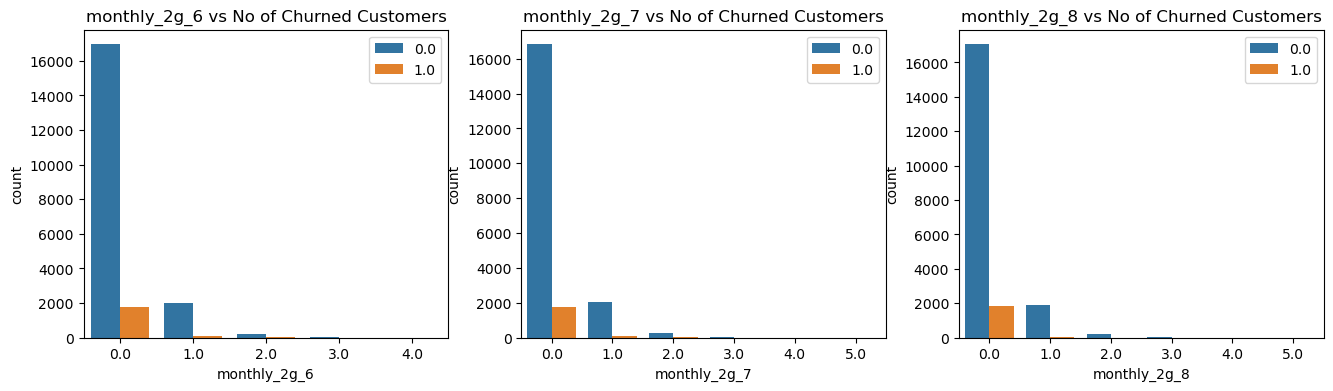

In [361]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

sachet_3g_6    float64
sachet_3g_7    float64
sachet_3g_8    float64
dtype: object


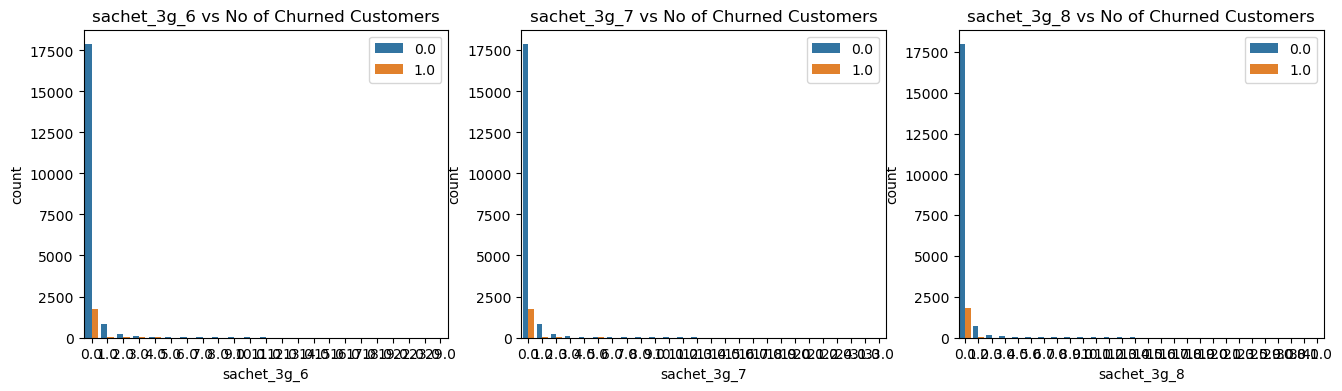

In [362]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
print(main_dataset[columns].dtypes)
cat_univariate_analysis(columns)

## 3.2 Bivariate Analysis

<AxesSubplot: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

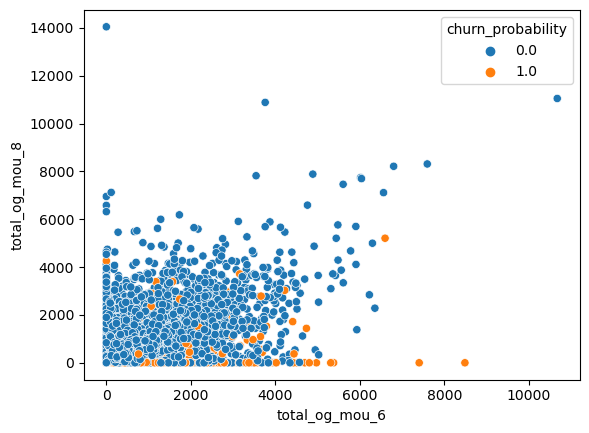

In [363]:
sns.scatterplot(x=main_dataset['total_og_mou_6'],y=main_dataset['total_og_mou_8'],hue=main_dataset['churn_probability'])


<AxesSubplot: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

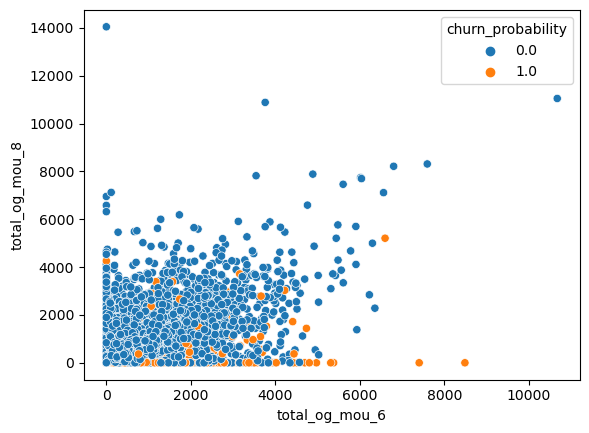

In [364]:
sns.scatterplot(x=main_dataset['total_og_mou_6'],y=main_dataset['total_og_mou_8'],hue=main_dataset['churn_probability'])

<AxesSubplot: xlabel='aon', ylabel='total_og_mou_8'>

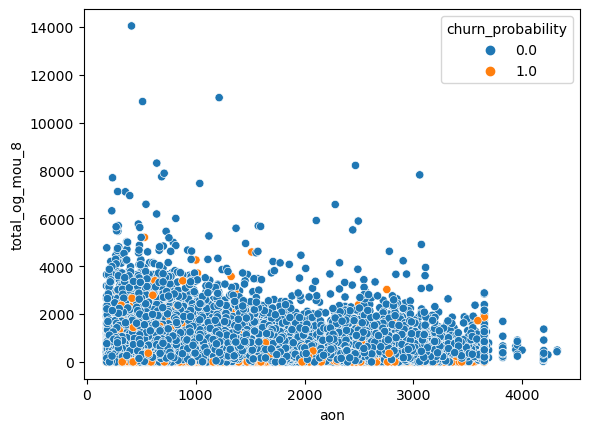

In [365]:
sns.scatterplot(x=main_dataset['aon'],y=main_dataset['total_og_mou_8'],hue=main_dataset['churn_probability'])

## 3.3 Correlation Analysis

In [366]:
# function to correlate variables
def correlation(dataframe) :

    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)

    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [367]:
pd.set_option('display.precision', 2)
cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
isd_og_mou_7,isd_og_mou_6,0.960000
arpu_8,total_rech_amt_8,0.960000
isd_og_mou_7,isd_og_mou_8,0.960000
isd_og_mou_8,isd_og_mou_6,0.960000
total_rech_amt_7,arpu_7,0.950000
arpu_6,total_rech_amt_6,0.940000
Average_rech_amt_6n7,arpu_7,0.920000
total_ic_mou_6,loc_ic_mou_6,0.910000
total_rech_amt_7,Average_rech_amt_6n7,0.910000
Average_rech_amt_6n7,total_rech_amt_6,0.900000


## 3.4 Data Preparation

In [368]:
# Derived variables to measure change in usage 

# Usage 
main_dataset['delta_vol_2g'] = main_dataset['vol_2g_mb_8'] - main_dataset['vol_2g_mb_6'].add(main_dataset['vol_2g_mb_7']).div(2)
main_dataset['delta_vol_3g'] = main_dataset['vol_3g_mb_8'] - main_dataset['vol_3g_mb_6'].add(main_dataset['vol_3g_mb_7']).div(2)
main_dataset['delta_total_og_mou'] = main_dataset['total_og_mou_8'] - main_dataset['total_og_mou_6'].add(main_dataset['total_og_mou_7']).div(2)
main_dataset['delta_total_ic_mou'] = main_dataset['total_ic_mou_8'] - main_dataset['total_ic_mou_6'].add(main_dataset['total_ic_mou_7']).div(2)
main_dataset['delta_vbc_3g'] = main_dataset['vbc_3g_8'] - main_dataset['vbc_3g_6'].add(main_dataset['vbc_3g_7']).div(2)

# Revenue 
main_dataset['delta_arpu'] = main_dataset['arpu_8'] - main_dataset['arpu_6'].add(main_dataset['arpu_7']).div(2)
main_dataset['delta_total_rech_amt'] = main_dataset['total_rech_amt_8'] - main_dataset['total_rech_amt_6'].add(main_dataset['total_rech_amt_7']).div(2)

In [369]:
# Removing variables used for derivation : 
main_dataset.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

In [370]:
# Looking at quantiles from 0.90 to 1. 
main_dataset.quantile(np.arange(0.9,1.01,0.01)).style.bar()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,798.749000,825.241000,724.516000,927.069000,936.654000,860.685000,32.996000,18.580000,18.083000,66.169000,41.246000,37.239000,205.590000,206.510000,195.840000,436.426000,433.799000,413.016000,18.396000,18.690000,16.860000,4.010000,4.710000,4.380000,655.966000,649.494000,623.402000,637.906000,669.860000,570.832000,624.491000,654.414000,542.319000,2.160000,2.110000,1.808192,1153.883000,1188.231000,1066.884000,0.000000,0.000000,0.030000,15.933000,19.296000,18.139000,2.280000,0.000000,0.000000,154.052000,154.880000,147.389000,366.680000,359.855000,357.419000,39.310000,41.180000,37.366000,556.975000,551.030000,543.820000,33.880000,35.233000,31.696000,73.202000,74.846000,67.930000,4.343000,4.553000,3.866000,114.848000,117.875000,106.716000,0.290000,0.000000,0.028802,14.810000,17.680000,15.303000,1.180000,1.580000,1.294567,23.000000,23.000000,21.000000,279.000000,279.000000,252.000000,250.000000,250.000000,225.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2844.000000,0.000000,1113.650000,29.128500,154.610000,346.729500,146.954500,70.620500,253.846100,316.150000
0.910000,854.350500,879.661600,785.119400,980.440800,984.972900,907.713500,39.733500,23.769400,22.449400,78.924100,50.483500,46.558800,222.541100,222.344600,213.043400,461.774100,456.834700,437.419900,20.219400,20.790000,18.724100,4.654700,5.400000,5.050000,697.687000,685.688100,659.813500,697.098000,728.173600,624.855800,672.874500,704.846800,595.331000,2.819400,2.730000,2.084700,1214.057000,1251.372900,1135.147500,0.000000,0.050000,0.260000,17.690000,21.104700,19.810000,2.580000,0.000000,0.000000,164.334700,165.730000,157.992900,389.128700,382.466400,378.290000,43.719400,45.644100,41.524100,591.474100,581.879300,575.557000,37.280000,38.834700,35.483500,79.219400,81.649400,74.490000,5.180000,5.540000,4.654700,124.774100,128.213500,115.939900,0.300000,0.000000,0.028802,17.980000,21.494700,18.969400,1.450000,1.930000,1.510000,24.000000,24.000000,22.000000,325.000000,325.000000,289.000000,250.000000,250.000000,250.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2909.000000,0.000000,1151.500000,38.755800,217.699050,379.509650,160.974100,96.374700,275.752580,345.000000
0.920000,916.618000,940.243200,851.25600

In [371]:
# Looking at percentage change in quantiles from 0.90 to 1. 
main_dataset.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,6.961073,6.594510,8.364674,5.757047,5.158671,5.464078,20.419142,27.930032,24.146436,19.276549,22.396111,25.026988,8.245099,7.667716,8.784416,5.808110,5.310224,5.908706,9.911937,11.235955,11.056346,16.077307,14.649682,15.296804,6.360238,5.572661,5.840774,9.279110,8.705341,9.464045,7.747670,7.706559,9.775059,30.527778,29.383886,15.291972,5.214913,5.313941,6.398399,nan,inf,766.666667,11.027427,9.373445,9.212195,13.157895,nan,nan,6.674824,7.005424,7.194499,6.122150,6.283475,5.839365,11.216993,10.840457,11.128031,6.194012,5.598479,5.835938,10.035419,10.222519,11.949457,8.220267,9.089865,9.657000,19.272392,21.678014,20.400931,8.642815,8.770732,8.643409,3.448276,nan,0.000000,21.404456,21.576357,23.958701,22.881356,22.151899,16.641352,4.347826,4.347826,4.761905,16.487455,16.487455,14.682540,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,2.285513,nan,3.398734,33.051135,40.805284,9.454099,9.540096,36.468448,8.629827,9.125415
0.920000,7.288285,6.886921,8.423763,6.664757,5.754910,5.193324,23.127336,26.549261,26.773990,21.396633,22.150009,22.996297,10.378173,9.171259,8.653542,6.212540,5.912095,6.072266,11.706579,12.419432,11.247003,17.730466,13.385185,14.851485,5.873493,5.665535,6.242203,8.861537,8.920345,9.136220,8.760014,9.380989,10.137856,31.588281,32.102564,32.393150,5.572803,5.867947,6.951317,inf,420.000000,150.000000,9.892595,10.036153,10.412923,12.790698,nan,nan,8.749522,8.066614,9.042622,6.289976,5.893537,5.706521,12.199161,12.535026,12.880953,5.945873,6.084887,6.093263,11.905579,12.264547,12.249355,10.947571,10.140675,10.371325,21.745174,20.216606,22.027198,9.083536,9.478019,10.264025,10.000000,nan,73.597613,20.927697,20.448297,24.469936,24.137931,22.093264,23.178808,4.166667,4.166667,4.545455,7.692308,7.692308,14.186851,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [372]:
# Columns with outliers 
pct_change_99_1 = main_dataset.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [373]:
# capping outliers to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = main_dataset[col].quantile(0.99)
    condition = main_dataset[col] > outlier_threshold
    outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : main_dataset.loc[condition,col].shape[0] }, ignore_index=True)
    main_dataset.loc[condition, col] = outlier_threshold

In [374]:
# categorical = main_dataset.dtypes == 'category'
# categorical_vars = main_dataset.columns[categorical].to_list()
# ind_categorical_vars = set(categorical_vars) - {'churn_probability'} #independent categorical variables
# ind_categorical_vars

# 4. Train-Test Split

In [375]:
y = main_dataset.pop('churn_probability') # Predicted / Target Variable
X = main_dataset # Predictor variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

# 5. Standardizing Columns

In [376]:
y.value_counts(normalize=True).to_frame()

# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()



In [377]:
condition1 = main_dataset.dtypes == 'int'
condition2 = main_dataset.dtypes == 'float'
numerical_vars = main_dataset.columns[condition1 | condition2].to_list()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

round(X_train.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
count,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00,14712.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.71,-0.71,-0.67,-0.98,-0.98,-0.95,-0.30,-0.27,-0.27,-0.31,-0.29,-0.30,-0.55,-0.56,-0.57,-0.83,-0.86,-0.84,-0.43,-0.44,-0.44,-0.34,-0.34,-0.35,-0.84,-0.87,-0.85,-0.51,-0.52,-0.49,-

# 6. Modelling

## 6.1 Logistic Regression

In [378]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [379]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [380]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [381]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[11299  2096]
 [  214  1103]]

Confusion Matrix for test: 
 [[4883  881]
 [  94  448]]


In [382]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.843
Sensitivity / True Positive Rate / Recall : 0.838
Specificity / True Negative Rate :  0.844
Precision / Positive Predictive Value : 0.345
F1-score : 0.489


Test Performance : 

Accuracy : 0.845
Sensitivity / True Positive Rate / Recall : 0.827
Specificity / True Negative Rate :  0.847
Precision / Positive Predictive Value : 0.337
F1-score : 0.479


In [383]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.00,0.00,0.09
0.1,0.98,0.39,0.44
0.2,0.96,0.56,0.60
0.3,0.92,0.68,0.70
0.4,0.89,0.77,0.78
0.5,0.84,0.84,0.84
0.6,0.78,0.90,0.88
0.7,0.70,0.93,0.91
0.8,0.56,0.96,0.92
0.9,0.40,0.98,0.93


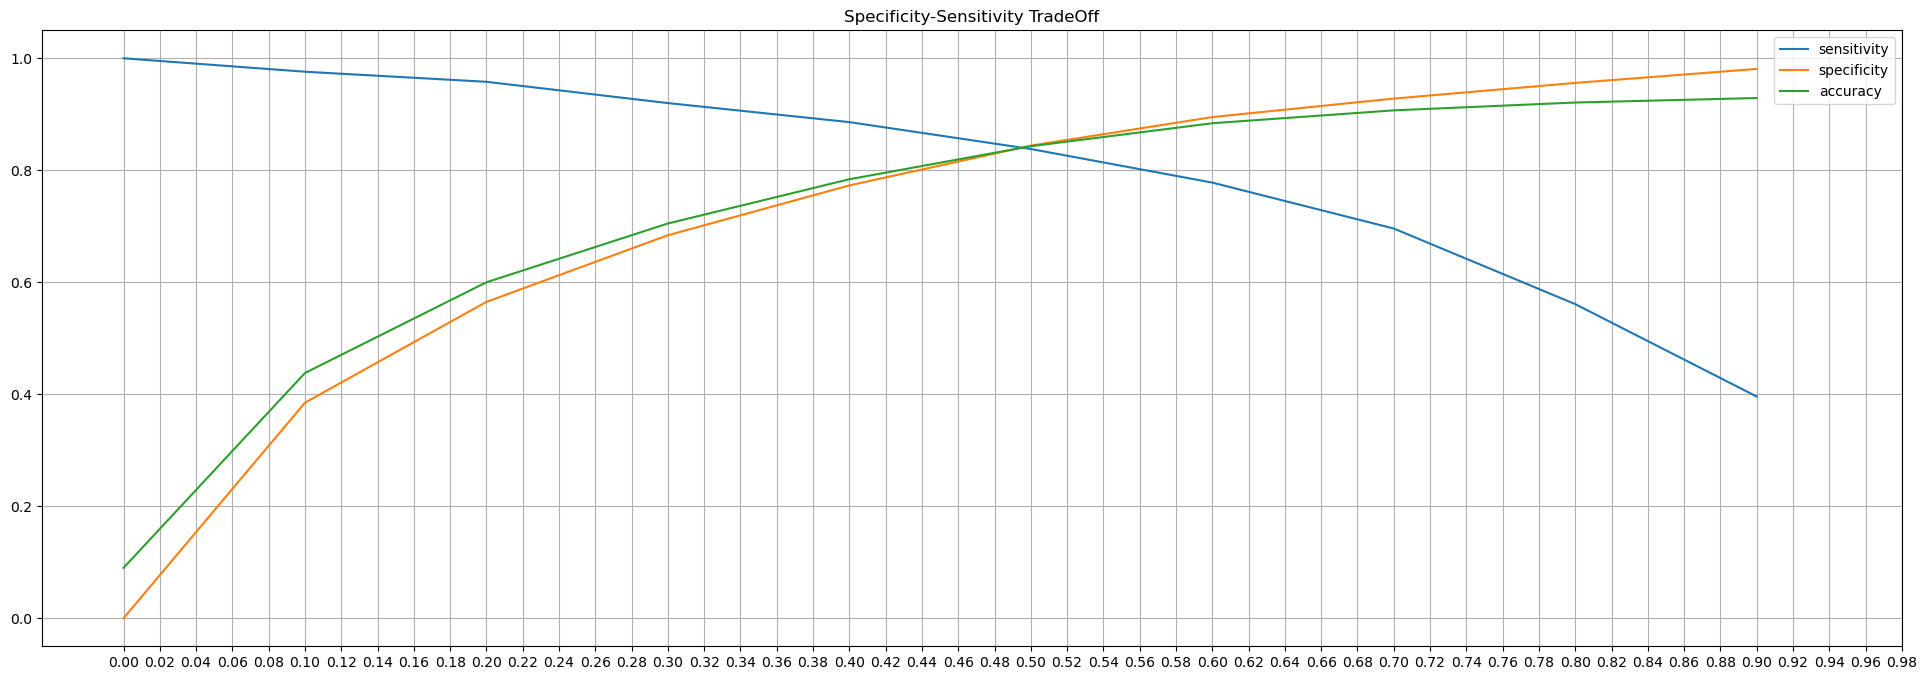

In [384]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

## 6.2 Feature Selection using RFE

In [385]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr)
results = rfe.fit(X_train,y_train)
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
0,onnet_mou_6,1,True
31,std_og_t2m_mou_7,1,True
32,std_og_t2m_mou_8,1,True
89,last_day_rch_amt_8,1,True
85,max_rech_amt_7,1,True
36,std_og_mou_6,1,True
83,total_rech_num_8,1,True
38,std_og_mou_8,1,True
82,total_rech_num_7,1,True
77,isd_ic_mou_8,1,True


In [386]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['onnet_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'last_day_rch_amt_8',
 'max_rech_amt_7',
 'std_og_mou_6',
 'total_rech_num_8',
 'std_og_mou_8',
 'total_rech_num_7',
 'isd_ic_mou_8',
 'spl_ic_mou_8',
 'std_ic_mou_8',
 'std_ic_mou_7',
 'std_ic_t2f_mou_8',
 'og_others_6',
 'std_ic_t2f_mou_7',
 'og_others_8',
 'std_ic_t2m_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'std_ic_t2m_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'loc_ic_mou_6',
 'std_og_t2m_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_og_t2t_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'delta_total_ic_mou',
 'offnet_mou_7',
 'offnet_mou_8',
 'delta_total_og_mou',
 'aon',
 'sachet_3g_8',
 'roam_og_mou_6',
 'sachet_3g_7',
 'roam_og_mou_8',
 'monthly_3g_8',
 'std_og_t2t_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'sachet_2g_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'sachet_2g_6',
 'monthly_2g_8',
 'loc_og_t2c_mou_8',

In [387]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight

logr = sm.GLM(y_train,(sm.add_constant(X_train[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                14712
Model:                            GLM   Df Residuals:                    14656
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.0
Date:                Fri, 07 Jul 2023   Deviance:                       5390.0
Time:                        23:16:56   Pearson chi2:                 1.09e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2106
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8463      0.079    -48.608      0.000      -4.001      -3.691
onnet_mou_6           -0.2607      0.141     -1.851      0.064      -0.537       0.015
std_og_t2m_mou_7      -0.6729      0.203     -3.319      0.001      -1.070      -0.276
std_og_t2m_mou_8       0.3313      0.306      1.083      0.279      -0.268       0.931
last_day_rch_amt_8    -0.5778      0.064     -9.052      0.000      -0.703      -0.453
max_rech_amt_7         0.0814      0.040      2.046      0.041       0.003       0.159
std_og_mou_6          -0.3690      0.243     -1.521      0.128      -0.845       0.107
total_rech_num_8      -0.5825      0.081     -7.223      0.000      -0.741      -0.424
std_og_mou_8           1.2214      0.313      3.903      0.000       0.608       1.835
total_rech_num_7       0.2294      0.057      3.991      0.000       0.117       0.342
isd_ic_mou_8           0.1070      0.045      2.389      0.017       0.019       0.195
spl_ic_mou_8          -0.6028      0.108     -5.596      0.000      -0.814      -0.392
std_ic_mou_8           0.4206      0.246      1.712      0.087      -0.061       0.902
std_ic_mou_7          -0.3150      0.213     -1.480      0.139      -0.732       0.102
std_ic_t2f_mou_8      -0.1672      0.082     -2.046      0.041      -0.327      -0.007
og_others_6           -0.0897      0.036     -2.477      0.013      -0.161      -0.019
std_ic_t2f_mou_7       0.1138      0.060      1.896      0.058      -0.004       0.231
og_others_8            0.6260      0.037     17.105      0.000       0.554       0.698
std_ic_t2m_mou_8      -0.3964      0.190     -2.090      0.037      -0.768      -0.025
loc_ic_t2t_mou_7       0.3934      0.154      2.557      0.011       0.092       0.695
loc_ic_t2t_mou_8      -0.2127      0.247     -0.861      0.389      -0.697       0.272
std_ic_t2m_mou_7       0.1220      0.160      0.761      0.447      -0.192       0.436
loc_ic_t2m_mou_7       0.5510      0.237      2.324      0.020       0.086       1.016
loc_ic_t2m_mou_8      -0.4560      0.398     -1.146      0.252      -1.236       0.324
std_ic_t2t_mou_8      -0.3709      0.136     -2.724      0.006      -0.638      -0.104
std_ic_t2t_mou_7       0.2231      0.099      2.256      0.024       0.029       0.417
loc_ic_mou_6          -0.2105      0.107     -1.966      0.049      -0.420      -0.001
std_og_t2m_mou_6       0.1922      0.158      1.213      0.225      -0.118       0.503
loc_ic_mou_7          -0.5869      0.319     -1.842      0.065      -1.211       0.037
loc_ic_mou_8          -0.0944      0.542     -0.174      0.862      -1.156       0.967
std_og_t2t_mou_6       0.4072      0.196      2.080      0.037       0.024       0.791
onnet_mou_7            0.4637      0.233      1.990      0.047       0.007       0.920
onnet_mou_8           -0.7149      0.2

In [388]:
selected_columns = rfe_selected_columns
selected_columns

['onnet_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'last_day_rch_amt_8',
 'max_rech_amt_7',
 'std_og_mou_6',
 'total_rech_num_8',
 'std_og_mou_8',
 'total_rech_num_7',
 'isd_ic_mou_8',
 'spl_ic_mou_8',
 'std_ic_mou_8',
 'std_ic_mou_7',
 'std_ic_t2f_mou_8',
 'og_others_6',
 'std_ic_t2f_mou_7',
 'og_others_8',
 'std_ic_t2m_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'std_ic_t2m_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2t_mou_7',
 'loc_ic_mou_6',
 'std_og_t2m_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_og_t2t_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'delta_total_ic_mou',
 'offnet_mou_7',
 'offnet_mou_8',
 'delta_total_og_mou',
 'aon',
 'sachet_3g_8',
 'roam_og_mou_6',
 'sachet_3g_7',
 'roam_og_mou_8',
 'monthly_3g_8',
 'std_og_t2t_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'sachet_2g_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'sachet_2g_6',
 'monthly_2g_8',
 'loc_og_t2c_mou_8',

# 6.3 Random Forest

In [390]:
from sklearn.ensemble import RandomForestClassifier

#creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08844799695499096,
                                     1: 0.911552003045009},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [391]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold

from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)


Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08844799695499096,
                                                            1: 0.911552003045009},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [ ]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

In [ ]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

In [ ]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

In [ ]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)


In [ ]:
## out of bag error 
pca_rf_best_fit.oob_score_

# 7. Testing with the test data (Unknown)

In [ ]:
main_dataset = pd.read_csv('test.csv')
main_dataset.shape

(30000, 171)

In [ ]:
print(main_dataset.shape)
main_dataset['Average_rech_amt_6n7']=(main_dataset['total_rech_amt_6']+main_dataset['total_rech_amt_7'])/2
print(main_dataset.shape)

#main_dataset=main_dataset[(main_dataset['Average_rech_amt_6n7']>= main_dataset['Average_rech_amt_6n7'].quantile(0.7))]
print(main_dataset.shape)

#Checking for missing values.
missing_values = metadata_matrix(main_dataset)[['Type', 'Null_per']].sort_values(by='Null_per', ascending=False)
missing_values[missing_values['Null_per']>0]
print(main_dataset.shape)

metadata = metadata_matrix(main_dataset)
high_missing_values = metadata[metadata['Null_per'] > 50 ]
high_missing_value_columns = high_missing_values.index
main_dataset.drop(columns=high_missing_value_columns, inplace=True)
print("Data")

print(main_dataset.shape)

month_columns = []
for column in main_dataset.columns:
    x = re.search("6$", column)
    if x:
        month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(main_dataset)
condition = metadata.index.isin(month_columns)
month_metadata = metadata[condition]
month_metadata[month_metadata['Null_per']>0]
print(main_dataset.shape)


month_missing_condition = month_metadata['Null_per'] == 1.06
month_missing_cols = month_metadata[month_missing_condition].index.values
# Looking at all sixth month columns where rows of *_mou are null
condition = main_dataset[month_missing_cols].isnull()
# data.loc[condition, sixth_month_columns]
print(main_dataset.shape)

# Rows is null for all the above columns
missing_rows = pd.Series([True]*main_dataset.shape[0], index = main_dataset.index)
for column in month_missing_cols :
    missing_rows = missing_rows & main_dataset[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', main_dataset.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', main_dataset.loc[missing_rows,'total_ic_mou_6'].unique()[0])

# Imputation
main_dataset[month_missing_cols] = main_dataset[month_missing_cols].fillna(0)

metadata = metadata_matrix(main_dataset)
print(main_dataset.shape)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(month_columns)].head()

# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6'
condition = main_dataset['date_of_last_rech_6'].isnull()
main_dataset[condition].filter(regex='.*rech.*6$', axis=1).head()

for a in ['7$','8$']:
    month_columns = []
    for column in main_dataset.columns:
        x = re.search(a, column)
        if x:
            month_columns.append(column)
    # missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
    metadata = metadata_matrix(main_dataset)
    condition = metadata.index.isin(month_columns)
    month_metadata = metadata[condition]
    month_metadata[month_metadata['Null_per']>0]
    month_missing_condition = month_metadata['Null_per'] == 1.06
    month_missing_cols = month_metadata[month_missing_condition].index.values
    # Looking at all sixth month columns where rows of *_mou are null
    condition = main_dataset[month_missing_cols].isnull()
    # data.loc[condition, sixth_month_columns]


    # Rows is null for all the above columns
    missing_rows = pd.Series([True]*main_dataset.shape[0], index = main_dataset.index)
    for column in month_missing_cols :
        missing_rows = missing_rows & main_dataset[column].isnull()

    print('Total outgoing mou for each customer with missing *_mou data is ', main_dataset.loc[missing_rows,'total_og_mou_6'].unique()[0])
    print('Total incoming mou for each customer with missing *_mou data is ', main_dataset.loc[missing_rows,'total_ic_mou_6'].unique()[0])
    # Imputation
    main_dataset[month_missing_cols] = main_dataset[month_missing_cols].fillna(0)

    metadata = metadata_matrix(main_dataset)

    # Remaining Missing Values
    metadata.iloc[metadata.index.isin(month_columns)].head()
print(main_dataset.shape)

main_dataset = main_dataset.set_index('id')
metadata=metadata_matrix(main_dataset)
singular_value_cols=metadata[metadata['Unique']==1].index.values
#Dropping singular value columns.
main_dataset.drop(columns=singular_value_cols,inplace=True)

date_columns = main_dataset.filter(regex='^date.*').columns
main_dataset.drop(columns=date_columns, inplace=True)
metadata_matrix(main_dataset)[metadata_matrix(main_dataset)['Null_per']>0]
print(main_dataset.shape)

#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imputed_train_df = imp_mean.fit_transform(main_dataset)
main_dataset = pd.DataFrame(imputed_train_df, index=main_dataset.index, columns=main_dataset.columns)
metadata_matrix(main_dataset)[metadata_matrix(main_dataset)['Null_per']>0]
main_dataset = main_dataset.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)
# Derived variables to measure change in usage 
print(main_dataset.shape)

# Usage 
main_dataset['delta_vol_2g'] = main_dataset['vol_2g_mb_8'] - main_dataset['vol_2g_mb_6'].add(main_dataset['vol_2g_mb_7']).div(2)
main_dataset['delta_vol_3g'] = main_dataset['vol_3g_mb_8'] - main_dataset['vol_3g_mb_6'].add(main_dataset['vol_3g_mb_7']).div(2)
main_dataset['delta_total_og_mou'] = main_dataset['total_og_mou_8'] - main_dataset['total_og_mou_6'].add(main_dataset['total_og_mou_7']).div(2)
main_dataset['delta_total_ic_mou'] = main_dataset['total_ic_mou_8'] - main_dataset['total_ic_mou_6'].add(main_dataset['total_ic_mou_7']).div(2)
main_dataset['delta_vbc_3g'] = main_dataset['vbc_3g_8'] - main_dataset['vbc_3g_6'].add(main_dataset['vbc_3g_7']).div(2)
print(main_dataset.shape)

# Revenue 
main_dataset['delta_arpu'] = main_dataset['arpu_8'] - main_dataset['arpu_6'].add(main_dataset['arpu_7']).div(2)
main_dataset['delta_total_rech_amt'] = main_dataset['total_rech_amt_8'] - main_dataset['total_rech_amt_6'].add(main_dataset['total_rech_amt_7']).div(2)
print(main_dataset.shape)

# Removing variables used for derivation : 
main_dataset.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

main_dataset.columns

(30000, 171)
(30000, 172)
(30000, 172)
(30000, 172)


Data
(30000, 142)
(30000, 142)
(30000, 142)
Total outgoing mou for each customer with missing *_mou data is  91.94
Total incoming mou for each customer with missing *_mou data is  41.73
(30000, 142)
Total outgoing mou for each customer with missing *_mou data is  91.94
Total incoming mou for each customer with missing *_mou data is  41.73
Total outgoing mou for each customer with missing *_mou data is  91.94
Total incoming mou for each customer with missing *_mou data is  41.73
(30000, 142)
(30000, 125)
(30000, 125)
(30000, 130)
(30000, 132)


Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'sachet_3g_8', 'aon', 'Average_rech_amt_6n7', 'delta_vol_2g',
       'delta_vol_3g', 'delta_total_og_mou', 'delta_total_ic_mou',
       'delta_vbc_3g', 'delta_arpu', 'delta_total_rech_amt'],
      dtype='object', length=111)

In [ ]:
main_dataset[rfe_selected_columns].shape

(30000, 55)

In [ ]:
#main_dataset['churn_probability'] = pca_rf_best_fit.predict(X_test_pca)
main_dataset['churn_probability'] = baseline_model.predict_proba(main_dataset)[:,1]


In [ ]:
main_dataset[main_dataset['churn_probability']==1]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
70025,125.86,1886.56,1490.18,20.54,119.58,64.28,19.28,2.39,0.00,80.29,55.84,0.00,5.44,48.76,17.96,9.26,70.78,22.69,0.00,0.00,0.0,0.00,0.00,0.00,14.71,119.54,40.66,51.39,1786.41,1472.21,0.00,44.33,41.58,0.00,0.00,0.0,51.39,1830.74,1513.79,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,3.73,14.63,19.38,13.81,40.63,23.44,0.00,0.00,0.00,17.55,55.26,42.83,0.00,19.08,34.63,7.15,0.00,1.21,0.00,0.00,0.00,7.15,19.08,35.84,0.0,0.0,0.0,0.00,40.26,39.13,0.00,0.00,0.00,6.0,7.0,15.0,150.0,229.0,229.0,150.0,229.0,17.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1163.0,537.0,199.34,322.22,546.26,48.16,185.39,280.68,385.0,1.0
70052,156.28,129.53,71.69,211.64,202.43,3.63,0.00,2.06,11.69,0.00,0.00,5.03,9.81,22.34,18.71,41.21,26.14,2.98,0.00,1.73,0.0,0.00,0.00,0.00,51.03,50.23,21.69,146.46,107.18,48.59,169.68,173.31,0.00,0.75,1.23,0.0,316.89,281.73,48.59,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.50,0.54,0.76,0.56,5.33,1.48,0.00,5.76,0.00,1.06,11.64,2.24,64.28,35.94,31.98,88.89,44.98,30.56,0.00,0.00,4.48,153.18,80.93,67.03,0.0,0.0,0.0,0.00,1.35,0.00,0.00,0.00,0.00,16.0,6.0,5.0,110.0,110.0,91.0,110.0,110.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,308.0,424.5,94.88,-259.41,-279.65,-54.81,0.00,-186.36,-242.5,1.0
70090,113.29,611.94,504.54,104.08,335.04,181.18,0.00,0.00,0.00,0.00,0.00,0.00,6.31,7.56,4.71,27.04,14.64,7.64,0.00,0.00,0.0,0.00,0.00,0.00,33.36,22.21,12.36,106.98,604.38,499.83,77.03,320.39,173.53,0.00,0.00,0.0,184.01,924.78,673.36,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1.83,3.66,0.00,1.68,11.04,11.56,0.00,0.00,0.00,3.51,14.71,11.56,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.51,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,7.0,21.0,13.0,50.0,67.0,50.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,393.5,0.00,0.00,103.55,2.19,0.00,30.90,2.5,1.0
70118,1428.76,1190.94,6.55,317.86,544.69,1.01,10.29,8.38,1.20,23.64,95.49,7.56,107.38,48.44,0.00,103.19,173.56,0.00,0.00,0.00,0.0,0.00,0.00,0.00,210.58,222.01,0.00,1305.74,1086.03,0.00,206.64,326.96,0.00,0.00,0.00,0.0,1512.39,1412.99,0.00,0.0,0.0,0.0,0.00,6.06,0.00,0.00,0.0,0.0,39.86,20.13,0.00,33.93,41.84,0.00,0.53,1.13,0.00,74.33,63.11,0.00,0.23,3.51,0.00,0.53,1.06,0.00,5.83,0.00,0.00,6.59,4.58,0.00,0.0,0.0,0.0,0.00,0

In [ ]:
main_dataset[main_dataset['churn_probability']==0]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,48.93,7.68,28.48,0.00,0.00,0.0,0.00,0.00,0.03,0.0,0.0,0.0,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.36,1.04,4.34,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.00,0.00,5.0,5.0,4.0,50.0,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1692.0,96.5,0.00,0.00,-14.22,-6.38,0.00,-14.16,-36.5,0.0
70000,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.00,23.76,17.68,0.00,0.00,0.8,0.00,0.00,0.00,0.0,0.0,0.0,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.00,0.00,5.0,4.0,5.0,250.0,250.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2533.0,500.0,0.00,0.00,-190.87,-36.32,0.00,-104.00,0.0,0.0
70001,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,6.0,9.0,5.0,300.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,750.0,0.00,0.00,0.00,0.00,25.49,363.88,250.0,0.0
70002,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.00,0.0,37.09,96.53,0.00,0.00,0.00,0.0,0.00,12.03,1.15,0.0,0.0,0.0,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88,8.83,0.00,0.00,0.00,9.63,16.14,8.83,0.00,0.00,0.00,0.00,1.43,8.65,0.0,0.00,0.00,3.0,5.0,2.0,110.0,150.0,0.0,110.0,150.0,0.0,0.0,0.0,0.

In [ ]:
main_dataset['churn_probability'] = main_dataset['churn_probability']

In [ ]:
main_dataset['churn_probability'].to_csv('prithvirajv_telecomchurn_pred.csv', sep=',', index=True)

# Conclusion

We can take the following suggestive steps to build the model:

- Preprocess data (convert columns to appropriate formats, handle missing values, etc.)
- Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).
- Derive new features.
- Reduce the number of variables using PCA.
- Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).
- Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.
- Finally, choose a model based on some evaluation metric.

## Business Recomendation

 - Average revenue per user more, those are likely to churn  if they are not happy with the network.
 - local calls minutes of usage has also has impact on churn .
 - Large difference between recharge amount between 6th and 7th month, also impact churn.
 - Users who are using more Roaminng in Outgoing and Incoming calls, are likely to churn.Compnay can focus on them too.